# Office Indoor Air Quality Data Exploration
## by Sandijs Vasilevskis

## Investigation Overview

> Describe the overall goals of your presentation here.



In [5]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style(style='whitegrid', 
              rc={'figure.figsize': (11.7,8.27), 
                  'xtick.major.size': 12, 'ytick.major.size': 12,
                  'font.size': 14, 'axes.titlesize': 14, 'axes.labelsize': 14})
%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

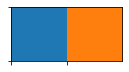

In [4]:
# Colors for plots
current_pallete =  sns.color_palette()
pallete = sns.color_palette().as_hex()

# Hex codes for BASELINE and MOBISTYLE colors
color_BL = '#1f77b4'
color_MS = '#ff7f0e'
color_other = '#2ca02c'
color_out = '#7f7f7f'
color_missing = 'lightgrey'

# Create dictionary pallete for Monitoring period
pal = dict(MOBISTYLE=color_MS, BASELINE=color_BL)

# Plot Colors for BASELINE and MOBISTYLE
sns.palplot([color_BL, color_MS])

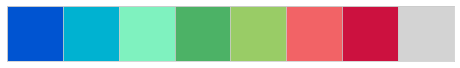

In [6]:
# Set bins and labels for Indoor environmental parameters
# The bin ranges ar based on an European building design standard DS/EN 15251:2007
bins_TEMP, bins_RH = [-10000, 19, 20, 21, 23, 24, 25, 10000], [-10000, 20, 25, 30, 50, 60, 70, 10000]
bins_CO2, bins_VOC = [-10000, 750, 900, 1200, 10000], [-10000, 40, 80, 100, 10000]

labels_T_RH = ['Cat -IV','Cat -III', 'Cat -II','Cat I', 'Cat +II','Cat +III','Cat +IV']
labels_CO2_VOC = ['Cat I', 'Cat II', 'Cat III', 'Cat IV']

# RGB codes for Comfort category colors
cmap_T_RH = [(0, .33, .82), (0, .7, .82), (.5, .95, .75), (.3, .7, .4), (.6, .8, .4), (.95, .39, .4), (.8, .07, .25), 'lightgrey']
cmap_CO2_VOC = [(.3, .7, .4), (.6, .8, .4), (.95, .39, .4), (.8, .07, .25), 'lightgrey']

# Plot diverging color pallete for Temperature and relative humidity categories
# Grey color for the missing data
sns.palplot(cmap_T_RH)

In [2]:
# load in the dataset into a pandas dataframe
# Assign categorical data types before reading CSV file
dtypes = {
    'Monitoring_Period': 'category',
    'Season': 'category',
    'Category_TEMP': 'category',
    'Category_RH': 'category',
    'Category_CO2': 'category',
    'Category_VOC': 'category',
}

# read CSV file
df = (pd.read_csv('./Files/office_air_quality_data.csv',                    
                    parse_dates=True,
                    dtype=dtypes,
                    index_col='Timestamp')
       )

# Filter the data, exclude the time outsied working hours
data = df.query('Room_Status == 1')

# Verify that all values are equal to 1 (Office room occupied)
assert data['Room_Status'].all() == 1

# Dataset was reduced by almost 2/3 after filtering
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 21248 entries, 2018-02-01 08:15:00 to 2019-11-29 17:15:00
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Room_Status          21248 non-null  float64 
 1   Window_State         21248 non-null  float64 
 2   Window_State_Change  21243 non-null  float64 
 3   CO2                  18211 non-null  float64 
 4   RH                   18211 non-null  float64 
 5   VOC                  18211 non-null  float64 
 6   Temperature          21248 non-null  float64 
 7   Monitoring_Period    21248 non-null  category
 8   Season               21248 non-null  category
 9   Category_TEMP        21248 non-null  category
 10  Category_RH          18211 non-null  category
 11  Category_CO2         18211 non-null  category
 12  Category_VOC         18211 non-null  category
 13  Outdoor_Temperature  21248 non-null  float64 
 14  Outdoor_RH           21248 non-null

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Dataset Overview

> Time series data

> 2 years with 15 minutes intervals

> Comparison of two Monitoring periods: BASELINE vs MOBISTYLE

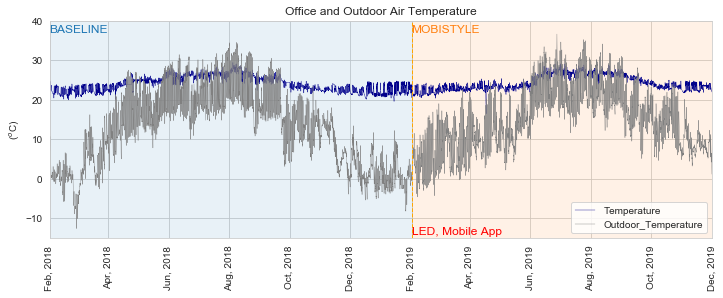

In [7]:
fig, ax = plt.subplots(figsize=(11.87, 4), sharex=True)

df.loc[:, ['Temperature', 'Outdoor_Temperature']].plot(title='Office and Outdoor Air Temperature', color=['darkblue', 'grey'],
                                                       linewidth=.4, ax=ax)
ax.axvline(x='02-01-2019', color='orange', linestyle='--', linewidth=1)
ax.fill_between(df.loc['02-01-2019':, :].index.values, -15, 40, facecolor=color_MS, alpha=0.1)
ax.fill_between(df.loc[:'02-01-2019', :].index.values, -15, 40, facecolor=color_BL, alpha=0.1)
ax.text(x='02-01-2019', y=-14, s='LED, Mobile App', color='red', size=12);
ax.text(x='02-01-2019', y=37, s='MOBISTYLE', color=color_MS, size=12);
ax.text(x='02-01-2018', y=37, s='BASELINE', color=color_BL, size=12);
ax.set(ylim=(-15,40), xticks=pd.date_range(start='2018-02-1', periods=12, freq='2MS'), xlabel='', ylabel='($^o$C)');
ax.set_xticklabels(pd.date_range(start='2018-02-1', periods=12, freq='2MS').strftime('%b, %Y'), rotation=90);

## (Visualization 1)

> Write a comment about your visualization here. The visualization should be in
the next cell, as a sub-slide type. Make sure your visualizations are polished!

## (Visualization 2)

> You should have at least three visualizations in your presentation,
but feel free to add more if you'd like!

## (Visualization 3)



> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!